### Imports

In [75]:
import pandas as pd 
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split 

### Load dataset

In [76]:
train_data = pd.read_csv("./data/train/training.csv")

In [77]:
train_data.isnull().any().value_counts()
train_data.ffill(inplace=True)

In [78]:
train_data.isnull().any().value_counts()

False    31
Name: count, dtype: int64

### Read images from CSV

In [79]:
def get_Image_aka_X(train_data: pd.DataFrame)->np.ndarray:
    image_list = []
    for i in tqdm(range(train_data['Image'].count())):
        image = train_data['Image'][i].split(' ')
        image_list.append(image)
    
    train_x = np.array(image_list, dtype="float").reshape(-1, 96, 96, 1)
    return train_x

In [80]:
def get_Labels_aka_Y(train_data: pd.DataFrame)->np.ndarray : 

    train_y = []
    images = train_data['Image'].count()
    training_labels = train_data.drop('Image', axis=1)

    for i in tqdm(range(0,images)):
        y = training_labels.iloc[i,:]

        train_y.append(y)
    
    return train_y

In [81]:
train_x  = get_Image_aka_X(train_data)

  0%|          | 0/7049 [00:00<?, ?it/s]

In [82]:
train_y = get_Labels_aka_Y(train_data)   

  0%|          | 0/7049 [00:00<?, ?it/s]

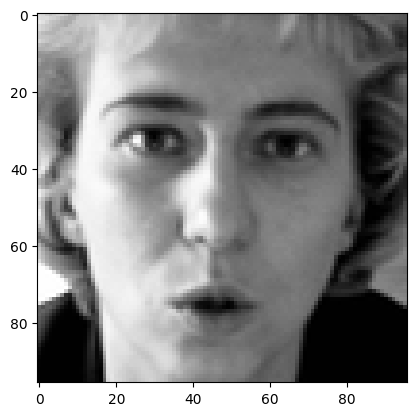

In [83]:
plt.imshow(train_x[1].reshape(96,96),cmap='gray')
plt.show()

### Draw keypoints

In [84]:
def draw_keypoints(image, series): 
    keypoints = {}
     
    # Extract keypoint pairs from the series
    for key in series.index:
        if key.endswith('_x'):
            # Base name without the coordinate suffix
            base_name = key[:-2]
            x_value = series[key]
            y_value = series[base_name + '_y']
            keypoints[base_name] = (x_value, y_value)

    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Plot each keypoint
    for key, (x, y) in keypoints.items():
        plt.plot(x, y, 'ro')  # Red dots for keypoints
        plt.text(x, y, key, fontsize=6, color='lime')

    plt.title('Facial Keypoints Detection')
    plt.show()

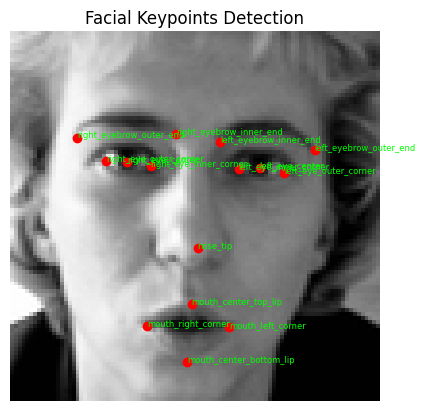

In [85]:
image = train_x[1].reshape(96,96)

labeled_keypoints = train_y[1]

draw_keypoints(image, labeled_keypoints)

### Split data to test and train

In [89]:
train_dataset, val_dataset = train_test_split(train_data,test_size=0.2, random_state=35)

In [90]:
train_dataset = train_dataset.reset_index(drop=True)
val_dataset = val_dataset.reset_index(drop=True)

In [91]:
train_x = get_Image_aka_X(train_dataset)
train_y= get_Labels_aka_Y(train_dataset)

val_x = get_Image_aka_X(val_dataset)
val_y= get_Labels_aka_Y(val_dataset)

  0%|          | 0/5639 [00:00<?, ?it/s]

  0%|          | 0/5639 [00:00<?, ?it/s]

  0%|          | 0/1410 [00:00<?, ?it/s]

  0%|          | 0/1410 [00:00<?, ?it/s]

#### Draw keypoints to ensure that labels are correct

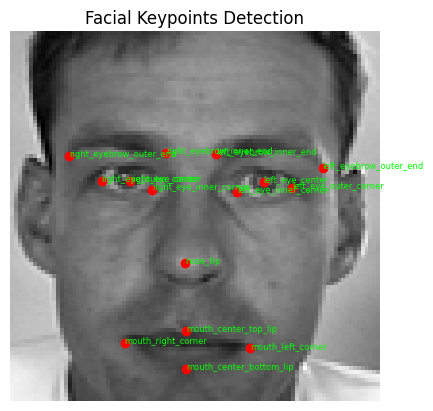

In [97]:
image = train_x[2].reshape(96,96)

labeled_keypoints = train_y[2]

draw_keypoints(image, labeled_keypoints)

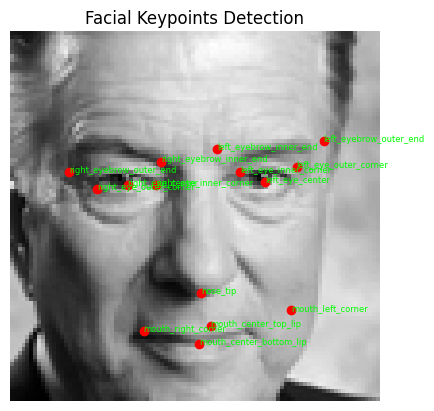

In [113]:
image = val_x[3].reshape(96,96)

labeled_keypoints = val_y[3]

draw_keypoints(image, labeled_keypoints)

### Save training and validation data as np array 

In [114]:
train_y = np.array(train_y,dtype = 'float')
val_y = np.array(val_y,dtype = 'float')

In [115]:
np.save('./data/train/training_data_x.npy', train_x)
np.save('./data/train/training_data_y.npy', train_y)

np.save('./data/val/validating_data_x.npy', val_x)
np.save('./data/val/validating_data_y.npy', val_y)

### Save dataset without splitting 



In [72]:
train_x = get_Image_aka_X(train_data)
train_y= get_Labels_aka_Y(train_data)

  0%|          | 0/7049 [00:00<?, ?it/s]

  0%|          | 0/7049 [00:00<?, ?it/s]

In [73]:
train_y = np.array(train_y,dtype = 'float')

In [74]:
np.save('./data/train/training_data_x_full.npy', train_x)
np.save('./data/train/training_data_y_full.npy', train_y)
